In [1]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0


In [2]:
# 生成数据集
# y = -3.27x1 + 6.54x2 + 15.93
# y = Xw + b
true_w = torch.tensor([-3.27, 6.54]).reshape(-1, 1)
true_b = 15.93

# X = torch.rand(size=(1000, 2)) * 10
X = torch.normal(size=(1000, 2), mean=5, std=2)
y = torch.matmul(X, true_w) + true_b

noise = torch.normal(mean=0, std=0.5, size=(1000, 1))
y += noise

X.size(), y.size()

(torch.Size([1000, 2]), torch.Size([1000, 1]))

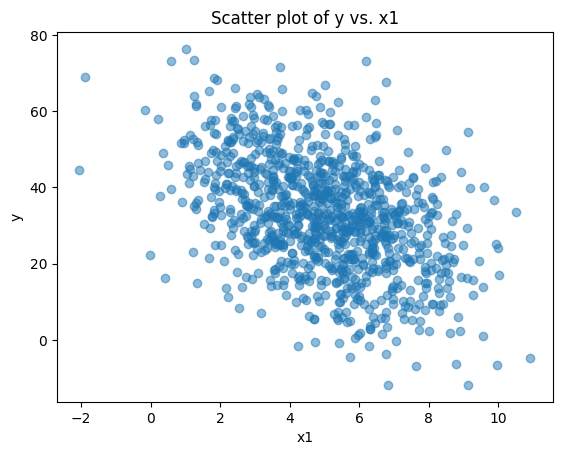

In [3]:
# alpha用来调整点的透明度
plt.scatter(X[:, 0].flatten(), y.reshape(1000, -1).numpy(), alpha=0.5)
plt.title('Scatter plot of y vs. x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

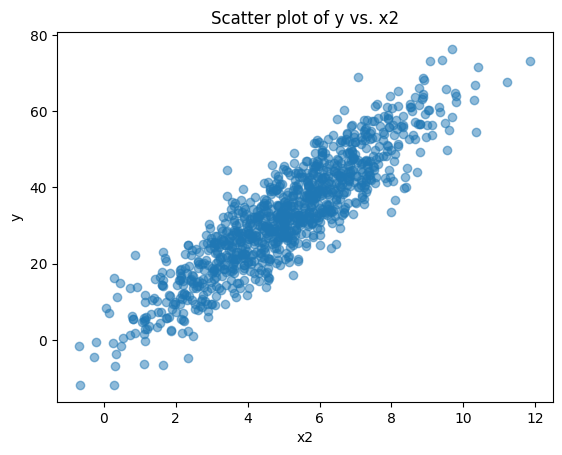

In [4]:
plt.scatter(X[:, 1].flatten(), y.reshape(1000, -1).numpy(), alpha=0.5)  # Plot the points with some transparency
plt.title('Scatter plot of y vs. x2')
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

In [5]:
def data_iter(batch_size, X, y):
    # 从数据集X, y中随机去除batch_size组
    num_examples = len(X)
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        # 防止最后一次迭代不足一个batch
        select = torch.LongTensor(idx[i: min(i + batch_size, num_examples)])
        # 0代表从第一个维度选择
        yield X.index_select(0, select), y.index_select(0, select)

In [6]:
# 检查一下迭代器
batch_size = 10
for features, labels in data_iter(batch_size, X, y):
    print(features.size(), labels.size())
    print(features)
    print(labels)
    break

torch.Size([10, 2]) torch.Size([10, 1])
tensor([[-0.1666,  6.6744],
        [ 4.7153,  0.7946],
        [ 3.0174,  3.6110],
        [ 5.9493,  3.9933],
        [ 6.5835,  6.7340],
        [ 2.8655,  4.3396],
        [ 3.8436,  2.0938],
        [ 4.5343,  8.9417],
        [ 5.3915,  1.5161],
        [ 7.6528,  7.1721]])
tensor([[60.3006],
        [ 5.5067],
        [28.6770],
        [23.4265],
        [38.6800],
        [34.5907],
        [15.6054],
        [59.1514],
        [ 7.3783],
        [38.0359]])


In [7]:
w = torch.normal(mean=0, std=1, size=(2, 1))
b = torch.normal(mean=0, std=1, size=(1, 1))
w, b

(tensor([[ 1.1521],
         [-0.4515]]),
 tensor([[-0.4004]]))

In [8]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([[-0.4004]], requires_grad=True)

In [9]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [10]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.size())) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [12]:
lr, num_epochs, net, loss = 0.003, 50, linreg, squared_loss

for epoch in range(num_epochs):
    for features, labels in data_iter(batch_size, X, y):
        l = loss(net(features, w, b), labels).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
    train_loss = loss(net(X, w, b), y)
    print('epoch %d: loss %f' %(epoch + 1, train_loss.mean().item()))

epoch 1: loss 19.958561
epoch 2: loss 9.566639
epoch 3: loss 8.371909
epoch 4: loss 7.923563
epoch 5: loss 7.587144
epoch 6: loss 7.347184
epoch 7: loss 6.993629
epoch 8: loss 6.685630
epoch 9: loss 6.407188
epoch 10: loss 6.238505
epoch 11: loss 5.887705
epoch 12: loss 5.620849
epoch 13: loss 5.419120
epoch 14: loss 5.164024
epoch 15: loss 5.020682
epoch 16: loss 4.772171
epoch 17: loss 4.703855
epoch 18: loss 4.377185
epoch 19: loss 4.175868
epoch 20: loss 4.042458
epoch 21: loss 3.837074
epoch 22: loss 3.680355
epoch 23: loss 3.529346
epoch 24: loss 3.393696
epoch 25: loss 3.255760
epoch 26: loss 3.118821
epoch 27: loss 2.982508
epoch 28: loss 2.887226
epoch 29: loss 2.760805
epoch 30: loss 2.649239
epoch 31: loss 2.524932
epoch 32: loss 2.426062
epoch 33: loss 2.344190
epoch 34: loss 2.320929
epoch 35: loss 2.156094
epoch 36: loss 2.054722
epoch 37: loss 1.971411
epoch 38: loss 1.892554
epoch 39: loss 1.827362
epoch 40: loss 1.745128
epoch 41: loss 1.686568
epoch 42: loss 1.611725


In [13]:
true_w, w

(tensor([[-3.2700],
         [ 6.5400]]),
 tensor([[-2.7851],
         [ 7.0056]], requires_grad=True))

In [14]:
true_b, b

(15.93, tensor([[10.6322]], requires_grad=True))